<h1>PROJET: ANALYSE DES VENTES D'UN SUPERMARCHÉ</h1>

<H2>Dans la cadre de notre projet nous chercherons a repondre aux questions suivnates:</H2>
<ul>
<li>quel est le meilleur mois de vente et quel est le chiffre d'affaire de ce mois?</li>
<li>a quel heure devons nous laisser passer la publicité pour augmenter nos ventes?</li>
<li>dans quels ville a t'on le plus vendus de produits?</li>
<li>quels sont les produits qui sont souvent acheter ensemble?</li>
<li>quel produit a t'on le plus vendu ?</li>
</ul>

Importation des bibliothéques et de la Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [2]:
data=pd.read_csv("all_data.csv")
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


<p>On a une dataset contenant:</p>
<ul>
    <li>l'ID des commandes</li>
    <li>les produits vendues</li>
    <li>la quantité</li>
    <li>le prix unitaire</li>
    <li>la date et l'heure de commande</li>
    <li>l'heure de la commande</li>
</ul>

In [3]:
data["Purchase Address"].value_counts()

Purchase Address
Purchase Address                          355
193 Forest St, San Francisco, CA 94016      9
223 Elm St, Los Angeles, CA 90001           8
279 Sunset St, San Francisco, CA 94016      8
197 Center St, San Francisco, CA 94016      7
                                         ... 
414 Sunset St, Los Angeles, CA 90001        1
191 Wilson St, Atlanta, GA 30301            1
359 Meadow St, New York City, NY 10001      1
703 Highland St, Dallas, TX 75001           1
220 12th St, San Francisco, CA 94016        1
Name: count, Length: 140788, dtype: int64

In [4]:
data["Product"].value_counts()

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: count, dtype: int64

<h2>TRAITEMENT DES DONNÉES</h2>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
np.sum(data.isnull())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

On remarque ici le meme nombres de valeurs manquantes sur toutes les colonnes

In [7]:
df=np.sum(data.isnull(),axis=1)
df

0         0
1         6
2         0
3         0
4         0
         ..
186845    0
186846    0
186847    0
186848    0
186849    0
Length: 186850, dtype: int64

In [8]:
df.value_counts()

0    186305
6       545
Name: count, dtype: int64

On a donc 545 lignes distincte ne possédant que des valeurs manquantes.

<h3>Suppression des valeurs manquantes</h3>

In [9]:
data=data.dropna()
data.reset_index(drop=True,inplace=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
np.sum(data.isnull())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


Le type de toutes les colonnes est toujours "object".Donc toutes les données de ces colonnes sont considerer comme des chaines de caracteres.Or,des colonnes "Price Each" devraient etre considerer comme des floats. On peut conclure que dans ces colonnes sur certaines lignes nous avons des chaines de caracteres raison pour laquelle il sont considerer comme des chaines caracteres. 

In [12]:
df=data["Quantity Ordered"]
df

0         2
1         1
2         1
3         1
4         1
         ..
186300    3
186301    1
186302    1
186303    1
186304    1
Name: Quantity Ordered, Length: 186305, dtype: object

In [13]:
data["Quantity Ordered"]=data["Quantity Ordered"].astype(int)

ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

In [14]:
condition=data["Quantity Ordered"]=="Quantity Ordered"
data[condition]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


On constate que sur plusieurs lignes on a des les noms des colonnes a lieu d'infomations sur les commandes passées

Éliminons ces colonnes

In [15]:
index=data[condition].index

In [16]:

for i in index:
    if data.loc[i,"Quantity Ordered"] =="Quantity Ordered":
        data=data.drop(i)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [17]:
data.reset_index(drop=True,inplace=True)
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
185946,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
185947,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
185948,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


conversion de type

In [18]:
data["Quantity Ordered"]=data["Quantity Ordered"].astype(int)
data["Price Each"]=data["Price Each"].astype(float)
data["Order Date"]=pd.to_datetime(data["Order Date"])

C:\Users\PC\AppData\Local\Temp\ipykernel_2824\667123173.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Order Date"]=pd.to_datetime(data["Order Date"])


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 7.8+ MB


On extrait les jours,mois et années pour mieux les manipuler

In [20]:
data["years"]=data["Order Date"].dt.year
data["month"]=data["Order Date"].dt.month
data["day"]=data["Order Date"].dt.day
data["hour"]=data["Order Date"].dt.hour

In [21]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,years,month,day,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,9


Ajoutons le montant total a payer par article dans chaque commande 

In [22]:
data["total_income"]=data["Quantity Ordered"]*data["Price Each"]

In [23]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,years,month,day,hour,total_income
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,9,11.99


passons aux analyses

<h3>1) quel est le meilleur mois de vente et quel est le chiffre d'affaire de ce mois? </h3>

In [24]:
liste=[1,2,3,4,5,6,7,8,9,10,11,12] #liste de numéro referent les mois
months=["january","febuary","march","april","may","june","july","august","september","october","november","december"] 
#liste de mois
CA=[] # liste qui contiendra les chiffre d'affaires(CA) de chaque mois
for i in liste:
    condition=data["month"]==i #filtrage du dataframe selon le mois conserner
    chiffre=np.sum(data[condition]["total_income"]) #ccalcul du CA
    CA.append(chiffre) #ajout dans la liste
# creation d'un nouveau df
df={ 
    "month":months,
    "chiffre d'affaire":CA
}
df=pd.DataFrame(df)
df.sort_values("chiffre d'affaire",ascending=False,inplace=True) #tri par ordre decroissantdu df obtenue
df

,month,chiffre d'affaire
11,december,4613443.34
9,october,3736726.88
3,april,3390670.24
10,november,3199603.20
4,may,3152606.75
2,march,2807100.38
6,july,2647775.76
5,june,2577802.26
7,august,2244467.88
1,febuary,2202022.42


Donc <b>Decembre</b> est le meilleur mois de vente avec un chiffre d'affaire de <b><u>4613443.34</u></b> 

<h3>2) A quel heure devons nous laisser passer la publicité pour augmenter nos ventes?</h3>

<p>pour repondre a cette question, nous allons trouver au bout d'une journée le chiffre d'affaire realiser a chaque heure de la journée </p>

In [25]:
liste=np.arange(1,24,1)# liste avec des nombres entre 1 et 23 referencant les heures de la journée
moy=[] #liste pour le CA moyen realiser durant cette heure la

for i in liste: #parcour des heures
    condition=data["hour"]==i #filtrage selon les heures
    moy.append(np.mean(data[condition]["total_income"])) #ajout du CA moyen durant cette heure dans la liste
    
#creation d'un nouveau df
df5={
   "ventes moyennes":moy,
    "heures":liste
}
df5=pd.DataFrame(df5)
df5


,ventes moyennes,heures
0,196.113566,1
1,188.939212,2
2,175.400590,3
3,190.469567,4
4,174.625148,5
5,180.545125,6
6,185.702847,7
7,190.592866,8
8,187.360606,9
9,177.657782,10


<p>Representons tout cel par un graphe pour mieux visualiser les tendances</p>

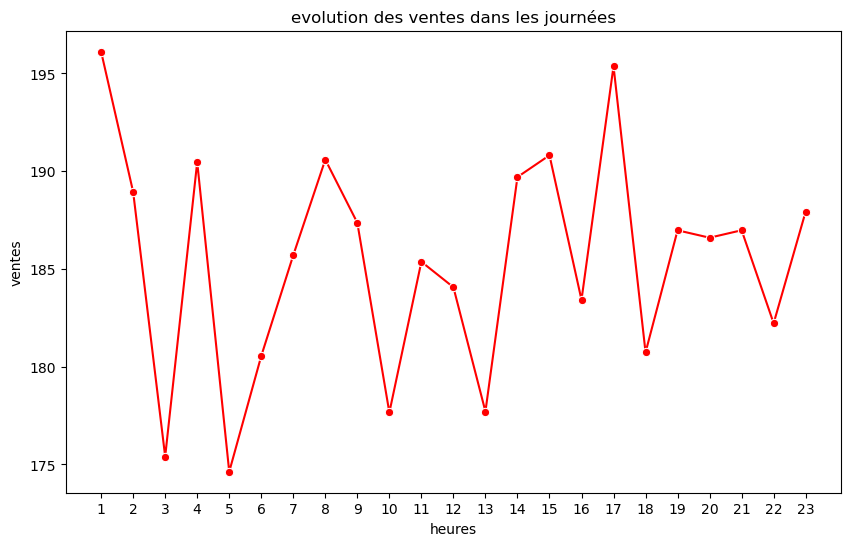

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="heures", y="ventes moyennes", data=df5, marker='o', color='red')
plt.xticks(liste)
plt.title("evolution des ventes dans les journées")
plt.xlabel("heures")
plt.ylabel("ventes")
plt.show()

<p>On peut dire ici que les heures durant lesquelles il faut faire passer les pubs sont les heures ou les ventes chuttes ,sont au plus bas pour justement remonter le chiffre sur la journée</p>

<p>Donc pour booster les ventes il nous faut faire passer les pubs entre 2 et 4 heure,entre 4 et 6 heures,entre 9 et 11  heure et entre 12 et 14 heures</p>

<h3>3) dans quels ville a t'on le plus vendus de produits?</h3>

<p>pour repondre a cette question nous devons avoir les noms des villes ou les commandes ont été passées.Or ici nous avons une adresse regroupant le numéro de rue,le nom de la ville et le code de l'état (vue qu'il s'agit des états unis.Il nous faut donc separer ces 3 informations et les ajouter au dataframe.</p>

In [27]:
rue=[] #liste de rues
ville=[] #liste de ville
état=[] #liste d'états
for i in data["Purchase Address"]: #parcour des adresses
    tab=i.split(",") #separation de la chaine suivant le separateur ","
    rue.append(tab[0]) #ajout de la partie correspondante a la liste
    ville.append(tab[1])
    état.append(tab[2])
#insertion des nouvelles colonnes
data["rue"]=rue
data["ville"]=ville
data["etat"]=état
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,years,month,day,hour,total_income,rue,ville,etat
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,19,8,23.90,917 1st St,Dallas,TX 75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,7,22,99.99,682 Chestnut St,Boston,MA 02215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,600.00,669 Spruce St,Los Angeles,CA 90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,12,14,11.99,669 Spruce St,Los Angeles,CA 90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,30,9,11.99,333 8th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",2019,9,17,20,8.97,840 Highland St,Los Angeles,CA 90001
185946,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",2019,9,1,16,700.00,216 Dogwood St,San Francisco,CA 94016
185947,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",2019,9,23,7,700.00,220 12th St,San Francisco,CA 94016
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",2019,9,19,17,379.99,511 Forest St,San Francisco,CA 94016


In [28]:
data.drop(columns=["Purchase Address"],inplace=True)
data.drop(columns=["Order Date"],inplace=True)

<p>determinons maintenant la ville avec le plus de ventes</p>

In [29]:
liste=np.array(data["ville"].value_counts().index) #liste contenant les noms des villes
qte=[] #liste devant contenir le nombre de ventes
for i in liste: #parcours des villes
    condition=data["ville"]==i #filtrage sur la ville correspondante
    qte.append(np.sum(data[condition]["Quantity Ordered"])) #ajout du nombre de vente dans ville
#creation d'un nuvau df et tri
df4={
    "nombre de produits vendus":qte,
    "ville":liste
}
df4=pd.DataFrame(df4)
df4.sort_values(by="nombre de produits vendus",ascending=False,inplace=True)
df4

,nombre de produits vendus,ville
0,50239,San Francisco
1,33289,Los Angeles
2,27932,New York City
3,22528,Boston
5,16730,Dallas
4,16602,Atlanta
6,16553,Seattle
7,14053,Portland
8,11153,Austin


<p>La ville ayant generer le plus de vente est <b><u>San Francisco</u></b> avec <b><u>50239</b></u> ventes</p>

<h3>4) Quels sont les produits qui sont souvent acheter ensemble?</h3>

<p>Pour repondre a cette question il nous faut tous les identifiants des commandes passées.Remarquons que un identifiant peut se retrouver sur plusieurs lignes </p>

In [30]:
data2=data["Order ID"].value_counts() 
data2

Order ID
160873    5
178158    4
277875    4
196615    4
304802    4
         ..
158177    1
158178    1
158179    1
158180    1
259357    1
Name: count, Length: 178437, dtype: int64

On a 178437 ID differents.Etant donner que nous nous interessons aux achats grouper, les ID n'apparaissant qu'une seule fois nous servirons pas.

In [31]:
filtre=data2[data2>1]

In [32]:
filtre

Order ID
160873    5
178158    4
277875    4
196615    4
304802    4
         ..
257079    2
254455    2
216943    2
253366    2
182756    2
Name: count, Length: 7136, dtype: int64

On remarque que l'on a effectuer 7136 achats de plus d'un produits. parmis eux regardons la proportions d'achat de 2,3,4 et 5 produits.

On peut deja voir sur l'affichage de "filtre" qu'il n'y a qu'un seul achat de 5 produits.

In [33]:
#creation de listes contenant chacune les ID des commandes correspondant 
filtre2=filtre[filtre==2]
filtre2=np.array(filtre2.index)

filtre3=filtre[filtre==3]
filtre3=np.array(filtre3.index)


filtre4=filtre[filtre==4]
filtre4=np.array(filtre4.index)

nb2=(len(filtre2)/7136)*100
nb3=(len(filtre3)/7136)*100
nb4=(len(filtre4)/7136)*100

print(nb2)
print(nb3)
print(nb4)


94.98318385650224
4.76457399103139
0.2382286995515695


La grande majorité des achats de plus de 1 article sont des achats de 2 articles dont nous nous concentrerons par la suite sur ces derniers

In [34]:
grp_prd=[]#liste de l'ensemble des produits de chaque commande par article.
for i in filtre2: 
    condition=data["Order ID"]==i
    grp_prd.append(",".join(data[condition]["Product"]))
grp_prd

['Apple Airpods Headphones,iPhone',
 'iPhone,Lightning Charging Cable',
 'AA Batteries (4-pack),USB-C Charging Cable',
 'Apple Airpods Headphones,Apple Airpods Headphones',
 'iPhone,Apple Airpods Headphones',
 'Lightning Charging Cable,20in Monitor',
 'Bose SoundSport Headphones,Google Phone',
 'iPhone,Lightning Charging Cable',
 'iPhone,Lightning Charging Cable',
 '27in 4K Gaming Monitor,34in Ultrawide Monitor',
 '27in FHD Monitor,27in 4K Gaming Monitor',
 'iPhone,Apple Airpods Headphones',
 'AA Batteries (4-pack),USB-C Charging Cable',
 'Google Phone,USB-C Charging Cable',
 '34in Ultrawide Monitor,Apple Airpods Headphones',
 'Lightning Charging Cable,Bose SoundSport Headphones',
 'USB-C Charging Cable,Wired Headphones',
 'iPhone,Apple Airpods Headphones',
 'Vareebadd Phone,Bose SoundSport Headphones',
 'Apple Airpods Headphones,Wired Headphones',
 '34in Ultrawide Monitor,iPhone',
 'Vareebadd Phone,USB-C Charging Cable',
 'Macbook Pro Laptop,Wired Headphones',
 'Vareebadd Phone,USB-C 

In [35]:
df={
    "Order ID":filtre2,
    "produits de la commande":grp_prd
}
df=pd.DataFrame(df)
df

,Order ID,produits de la commande
0,148324,"Apple Airpods Headphones,iPhone"
1,238970,"iPhone,Lightning Charging Cable"
2,170156,"AA Batteries (4-pack),USB-C Charging Cable"
3,170109,"Apple Airpods Headphones,Apple Airpods Headphones"
4,270900,"iPhone,Apple Airpods Headphones"
...,...,...
6773,257079,"iPhone,Macbook Pro Laptop"
6774,254455,"ThinkPad Laptop,Bose SoundSport Headphones"
6775,216943,"iPhone,Lightning Charging Cable"
6776,253366,"Google Phone,Wired Headphones"


In [36]:
df7["produits de la commande"].value_counts()[:10]

NameError: name 'df7' is not defined

Les produits les plus souvent achetés ensemble sont des produits achetés en paires de 2. Voici ceux Les plus achetés ensemble.

Pour les produits achetés en tous les 3 on a:

In [37]:
grp_prd2=[]
for i in filtre3:
    condition=data["Order ID"]==i
    grp_prd2.append(",".join(data[condition]["Product"]))
grp_prd2
df={
    "Order ID":filtre3,
    "produits de la commande":grp_prd2
}
df=pd.DataFrame(df)

In [38]:
df

,Order ID,produits de la commande
0,145059,"iPhone,Lightning Charging Cable,Wired Headphones"
1,185052,"Google Phone,USB-C Charging Cable,Wired Headph..."
2,255099,"iPhone,Lightning Charging Cable,Wired Headphones"
3,266506,"iPhone,Lightning Charging Cable,Wired Headphones"
4,290151,"iPhone,Lightning Charging Cable,Wired Headphones"
...,...,...
335,273751,"iPhone,Apple Airpods Headphones,Wired Headphones"
336,287017,"iPhone,Lightning Charging Cable,Wired Headphones"
337,163257,"iPhone,Apple Airpods Headphones,Wired Headphones"
338,214823,"iPhone,Lightning Charging Cable,Wired Headphones"


In [39]:
df8["produits de la commande"].value_counts()[:10]

NameError: name 'df8' is not defined

<h3>5) Quel produit a t'on le plus vendu ?</h3>

In [40]:
list_prd=np.array(data["Product"].value_counts().index)

In [41]:
qte=[]
for i in list_prd:
    condition=data["Product"]==i
    qte.append(np.sum(data[condition]["Quantity Ordered"]))
df={
    "produits":list_prd,
    "quantité vendue":qte
}
df=pd.DataFrame(df)
df.sort_values("quantité vendue",ascending=False,inplace=True)

In [42]:
df.reset_index(drop=True,inplace=True)
df

,produits,quantité vendue
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557
5,Apple Airpods Headphones,15661
6,Bose SoundSport Headphones,13457
7,27in FHD Monitor,7550
8,iPhone,6849
9,27in 4K Gaming Monitor,6244


<p>Le produit le plus acheté est <b>AAA Batteries (4-pack)</b> avec	<b>31017</b> achats<p>